# 6.2 Exploring Relations ships
## 1.Importing the necessary Libraries


In [19]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

##Load Cleansed Data set from boat_data_cleaned.csv file

In [20]:
data_cleaned=pd.read_csv("/content/drive/MyDrive/boat_data_cleaned.csv")
print(data_cleaned.dtypes)
data_cleaned.head()

Unnamed: 0                       int64
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
EUR Price                      float64
Country                         object
City                            object
Pricing Category                object
Boat Class                      object
Total_views                      int64
dtype: object


,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR Price,Country,City,Pricing Category,Boat Class,Total_views
0,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt,Low-priced,Class A,203469
1,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern,Low-priced,Class A,203469
2,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen,Low-priced,Class A,316879
3,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda,Low-priced,Class A,116749
4,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee,Low-priced,Class A,316879


##2. Select variables for exploratory visual analysis

In [21]:
 #Choosing relevant variables for exploratory visual analysis
selected_variables = ['EUR Price', 'Year Built', 'Length', 'Width', 'Number of views last 7 days']

# Create a new DataFrame with selected variables
selected_df = data_cleaned[selected_variables]
selected_df.head()

,EUR Price,Year Built,Length,Width,Number of views last 7 days
0,3490.0,2020,4.00,1.50,75
1,3399.0,2019,3.55,1.46,58
2,3570.0,1987,4.35,1.75,239
3,3500.0,2004,4.70,2.00,69
4,4692.0,2020,4.40,1.65,113


##3: Create a correlation matrix heatmap

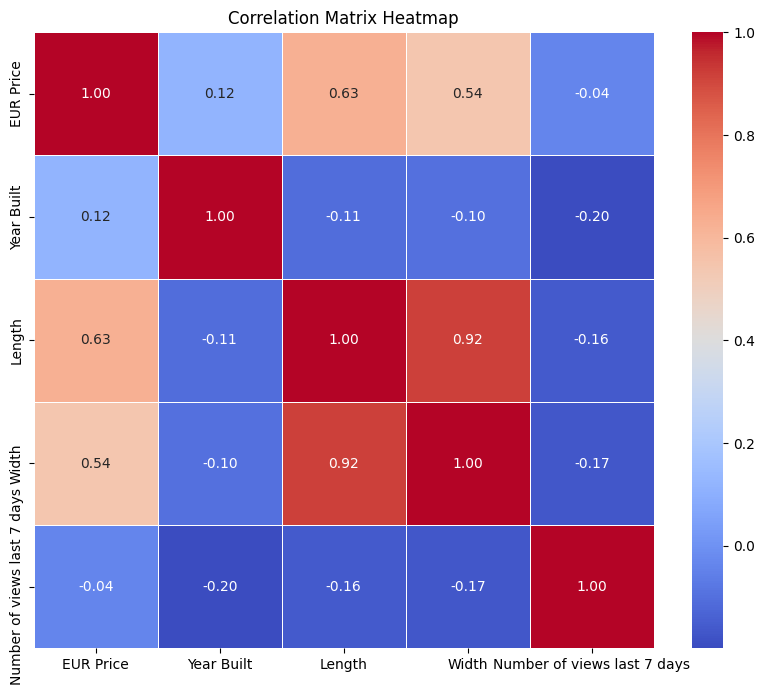

In [22]:
#Calculate correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##**Interpretation**
The heat map shows there is high correlation between the price
of a boat and the length of the boat. The as the length of the boat increase the price of the boat goes up.

## 4: Create scatterplots for variables with strong correlations

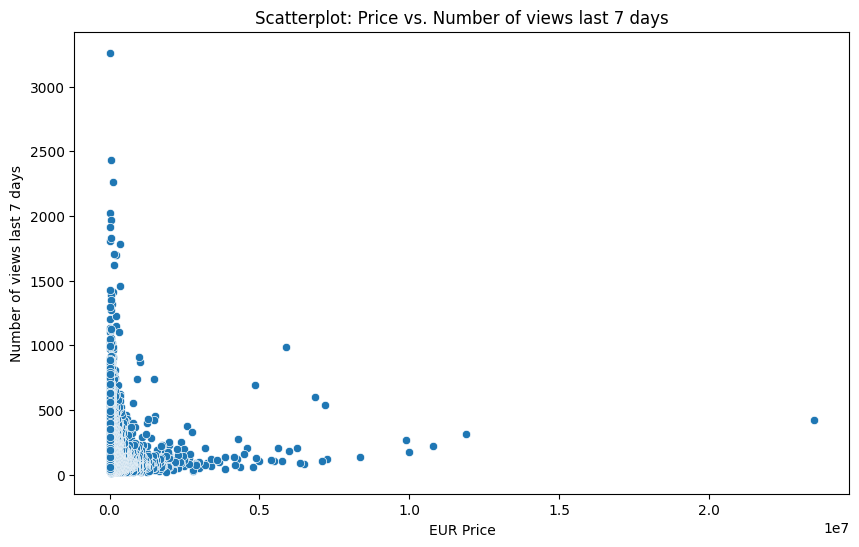

In [23]:
# Scatterplot for Price vs. Number of views last 7 days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EUR Price', y='Number of views last 7 days', data=selected_df)
plt.title('Scatterplot: Price vs. Number of views last 7 days')
plt.show()

There is a notable focus on listings with prices below 500,000 euros, and one particular boat, priced at under 200,000 euros, has garnered over 3000 views. It seems that a majority of customers interested in boat listings have a budget of approximately 300,000 euros. Intriguingly, there is a boat listed at well over 20,000,000 euros that has received 500 views in the last week. This could be attributed to customers admiring the boat and expressing curiosity about the highest-priced listing.

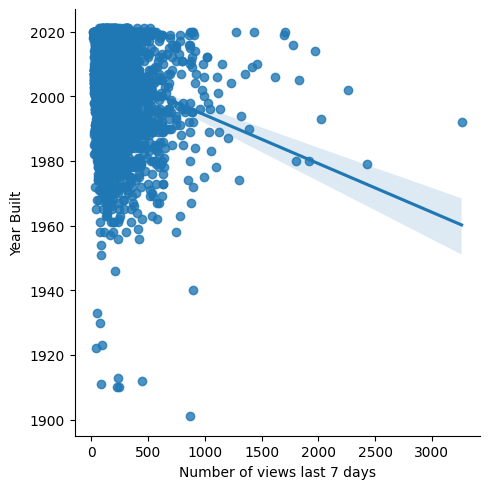

In [27]:
# Scatterplot for the "Number of views last 7 days" and the "Year Built"
sns.lmplot(x='Number of views last 7 days', y ='Year Built', data = selected_df)

There is a concentration of boats manufacturered between the years 1960 and 2020. There is a visible downward trend meaning that people are potentially favoring older models. This could be due to price and/or other factors as well.

### Scatterplot for the "Year Built" and the "EUR Price"

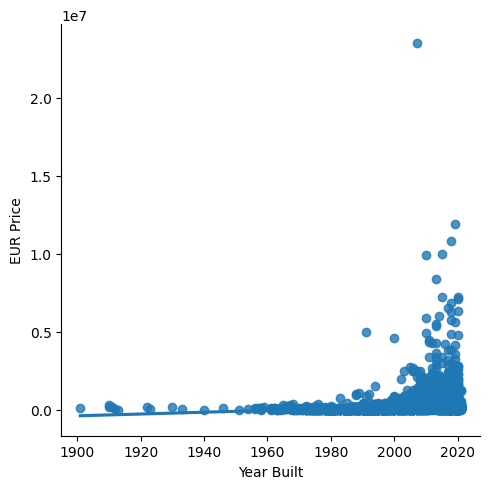

In [28]:
sns.lmplot(x='Year Built', y ='EUR Price', data = selected_df)

## 4. Pair Plots

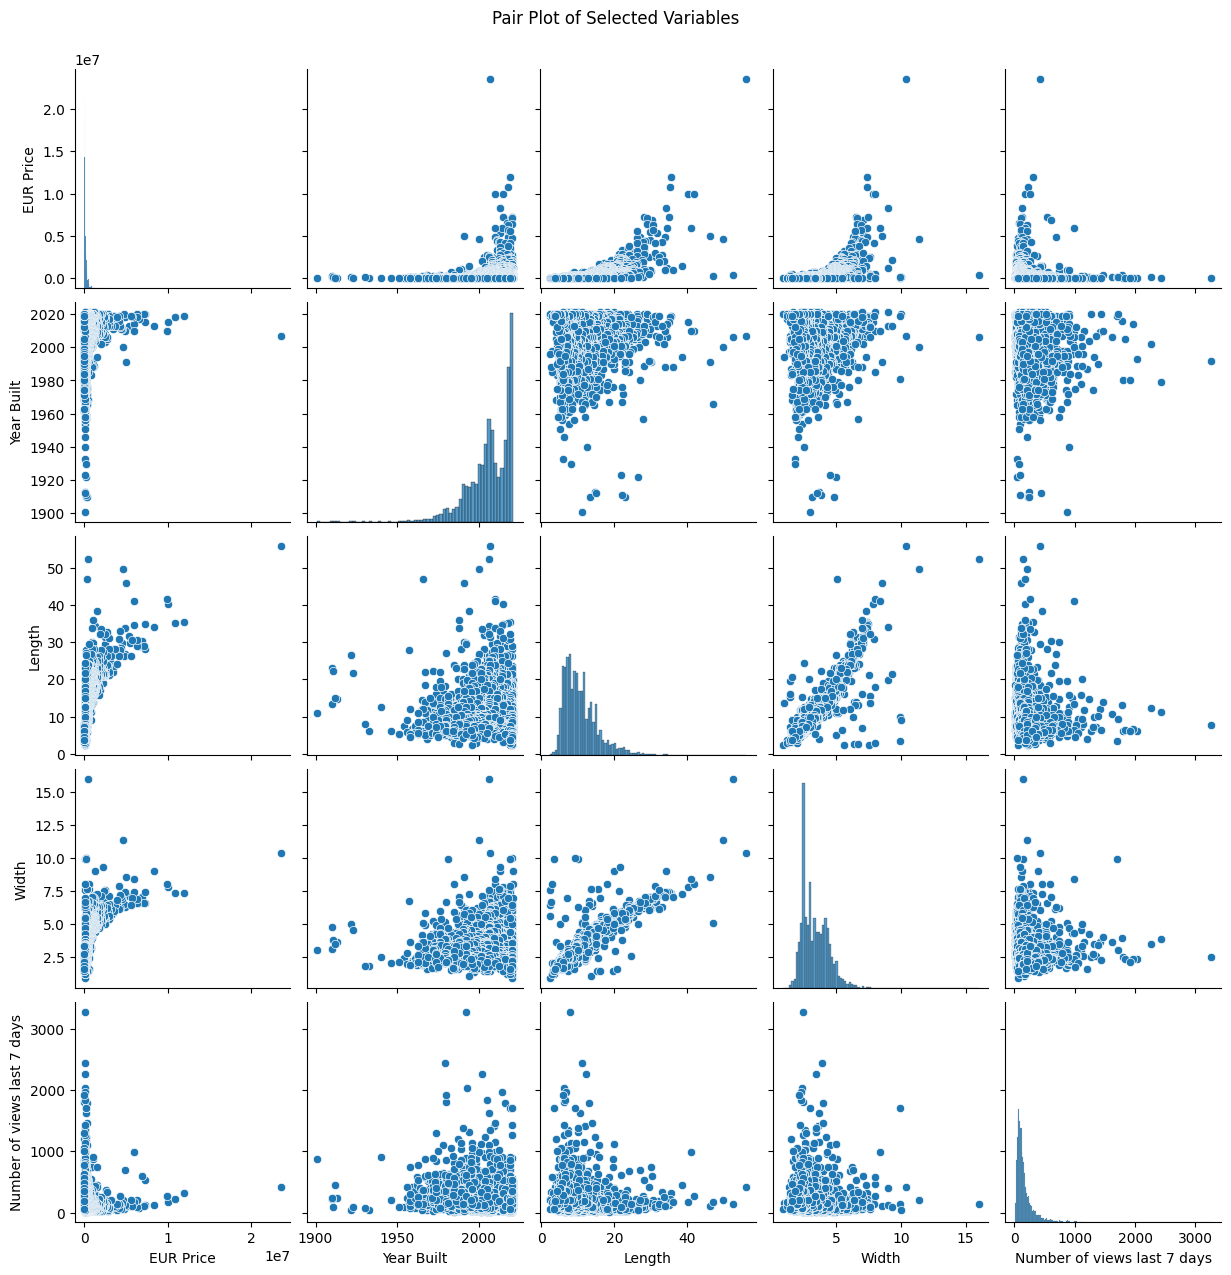

In [33]:
# Pair plot
sns.pairplot(selected_df)
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

## 5  Categorical plots

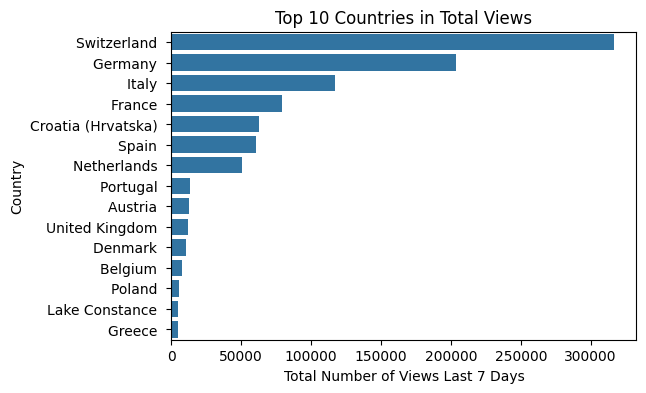

In [38]:
top10countries_by_views =data_cleaned.groupby('Country')['Number of views last 7 days'].sum().sort_values(ascending=False)[:15]
# print(top10countries_by_views)

plot_data = top10countries_by_views
fig, ax = plt.subplots(figsize = (6,4))
sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Total Number of Views Last 7 Days', ylabel = 'Country', title = 'Top 10 Countries in Total Views')
plt.show()

###**categorical plot according high views**

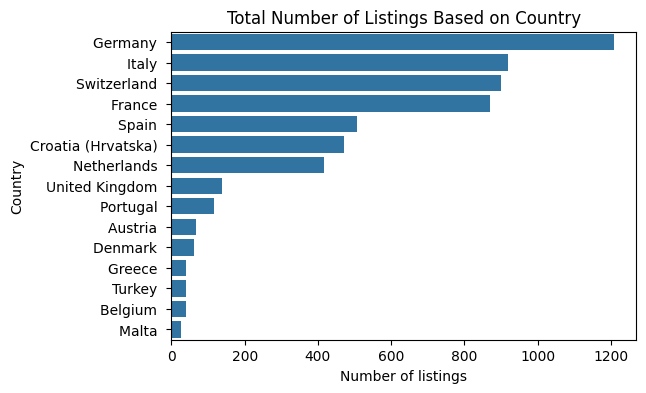

In [39]:
#
plot_data = data_cleaned['Country'].value_counts()[:15]

fig, ax = plt.subplots(figsize = (6,4))

sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Number of listings', ylabel = 'Country', title = 'Total Number of Listings Based on Country')
plt.show()

## 6 Questions and answers
The most obvious are the most common insights gained is that there the bigger the boat the higher price of the boat. It is important to note that customers will need to know the widht and length of the boat before making purchases.
###_hypothesis feedback per the analysis done_
1. Attributes of the boat listing with the highest viewship in the last 7 days?
  <br>Most viewed boats in the past week are listed above the 100,000 euros
2. What is the cost of the boat that garnered the highest number of views?
  <br>The boats that are are below 50,000 euros are getting listed attentions indicated low views records within the past one week and the boats with prices above 100,00 euros record the highest views
3. The characteristics among the most frequently viewed boats?
  <br> A common attributes among the boats with frequent views is mainly affected by the material variable. <br>The boats built with GRP received are frequently viewed and the also the boats that are vintage which means they are a bit older received also a sizeable amount of frequent views.
4. Where is the most viewed bot located?
<br>Germany, Italy, Switzerland, France, Spain have the most boats listed. But most viewed boats in the last 7 days in Switzerland, Germany, Italy, France - knowing the order, we can plan a marketing budget